Name:Ammar Zafar

Email:Ammarzafar028@gmail.com

Cell:03316895885

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


In [3]:
kashti=sns.load_dataset("titanic")
kashti.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

## Normal Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

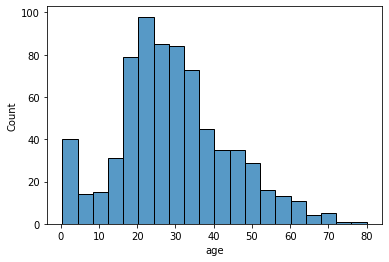

In [13]:
sns.histplot(kashti["age"])

# Shapriro Wilk test

In [14]:
from scipy.stats import shapiro
stat,p=shapiro(kashti["age"])
if p >0.05:
    print("probably Gaussian")
else:
    print("probably not Gaussian")


probably not Gaussian


In [6]:
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
kashti.dropna(subset=["age"],axis=0,inplace=True)
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Age,sex and fare
df=kashti[["sex","age","fare"]]
df.head()

sex   age     fare
0    male  22.0   7.2500
1  female  38.0  71.2833
2  female  26.0   7.9250
3  female  35.0  53.1000
4    male  35.0   8.0500

# T Test to compare to the age of male vs female

In [10]:

2 # import libraries
from scipy.stats import ttest_ind

# 2 subsets of male vs female
df_male=df[df["sex"]=="male"]
df_female=df[df["sex"]=="female"]

#3 t.test (un-paired,two sample, or independent test)
ttest_ind(df_male["age"],df_female["age"])
stat, p_value=ttest_ind(df_male["age"],df_female["age"])
print("stat=",stat,"p=",p_value)

# 4 conditional loops
if p_value  >0.05:
    print("There is no significance difference")
else:
    print("There is a significance difference")

stat= 2.499206354920835 p= 0.012671296797013709
There is a significance difference


# T test one sample

In [11]:

# 1 import libraries
from scipy.stats import ttest_1samp

# 2 subsets of male vs female
df_male=df[df["sex"]=="male"]
df_female=df[df["sex"]=="female"]

#3 t.test (un-paired,two sample, or independent test)
ttest_1samp(df_male["age"],36)
stat, p_value=ttest_1samp(df_male["age"],36)
print("stat=",stat,"p=",p_value)

# 4 conditional loops
if p_value >0.5:
    print("There is no significant difference")
else:
    print("There is a significant difference")

stat= -7.646511009251602 p= 1.2523613407424712e-13
There is a significant difference
